**Objective:**

The Fashion-MNIST dataset by Zalando made in 2017 consists of 70 thousand 28x28 images of clothing under 10 categories. It provides a more challenging classification task than the handwritten digits identification task of MNIST dataset from 1994.

Our goal here will be to build data preprocessing pipeline and a fine-tuned ML model to classify images into following categories:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's load essential packages and inform ourselves of their version in use:

In [3]:
print('Python Version : 3.9.18')

# for data manipulation
import pandas as pd
print('Pandas Version : ', pd.__version__)

# for data visualization
import matplotlib.pyplot as plt 
import matplotlib as mpl
print('Matplotlib Version : ', mpl.__version__)

# for machine learning
import sklearn as skl
print('SciKit-Learn Version : ', skl.__version__)

Python Version : 3.9.18
Pandas Version :  2.0.3
Matplotlib Version :  3.7.2
SciKit-Learn Version :  1.3.0


## Obtaining Dataset

Zalando Research provides the dataset in the `data/fashion` directory in [this GitHub repository](https://github.com/zalandoresearch/fashion-mnist). Correspondingly, I have downloaded the data into `data/fashion` directory in this repo.

To easily load the gzip data into Python, they provide a function called `load_mnist` located in the `utils/mnist_reader.py` file. We load the data using this function.

In [1]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

Note that the data is already split into a 'train' set of 60 thousand images for training, and a 't10k' set of 10 thousand immages for testing.

Let's explore the data:

In [8]:
print(X_train.shape, y_train)
print(X_test.shape, y_test)

(60000, 784) [9 0 0 ... 3 0 5]
(10000, 784) [9 2 1 ... 8 1 5]


Clearly, the 28x28-sized images have been flattened to an array of length 784. We can recreate the image by reshaping it. For example:

In [11]:
X_train[0].reshape((28,28)).shape

(28, 28)

Let's visualize some of these images with labels:

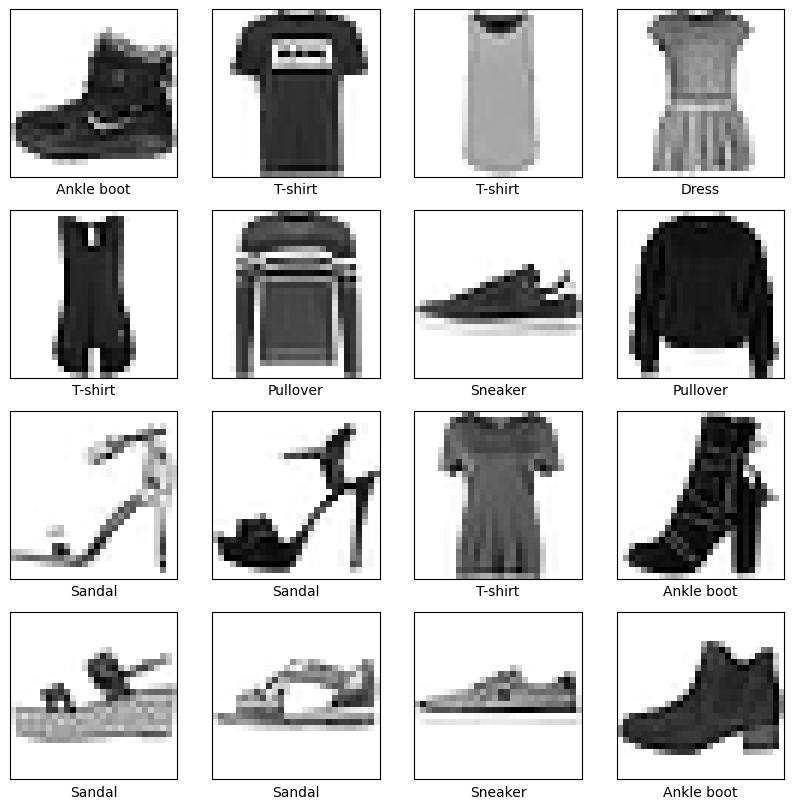

In [13]:
# store the label descriptions in a list to use in labelling the plotted images:
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# reshape the flattened images and scale the pixel intensities from 0 to 255 to 0 to 1:
sample_images = []
for i in range(16):
    sample_images.append(X_train[i].reshape((28,28)) / 255.0)

# make figure with the 16 images
plt.figure(figsize=(10,10))
for i in range(16):
    # position subplot in a 4x4 grid
    plt.subplot(4,4,i+1)

    # hide axes ticks and grid
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # show images with reverse gray color map
    plt.imshow(sample_images[i], cmap='gray_r')
    
    # add labels
    plt.xlabel(labels[y_train[i]])

# show the figure
plt.show()